<a href="https://colab.research.google.com/github/abdulSalamKagaji97/AbdulSalam_DATA690/blob/main/assignment_05/assignment05_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05 part 3

### Introduction to Jupyter Notebook


- Name: Abdul Salam Kagaji
- Date: 03/04/2022

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

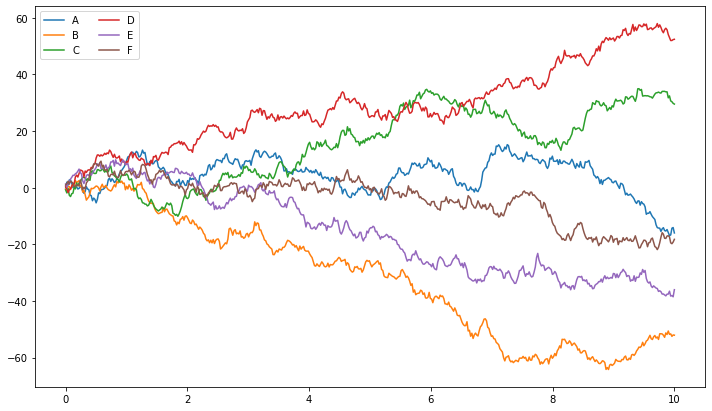

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [ ]:
import requests
import pandas as pd

In [ ]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [ ]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-02-25 13:41:49.070257')

In [ ]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [ ]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

**Bitcoin:**

In [ ]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-25 14:00:00,39367.63,39727.97,39268.39,39371.94,163.133327,6.435074e+06
2022-02-25 15:00:00,39404.56,39499.95,38930.12,39008.66,202.679814,7.940284e+06
2022-02-25 16:00:00,39038.52,39601.00,38730.34,39481.66,163.974131,6.420036e+06
2022-02-25 17:00:00,39442.92,39603.77,39214.60,39385.41,278.321318,1.096277e+07
2022-02-25 18:00:00,39390.28,39405.97,38881.31,38992.40,217.145286,8.492743e+06


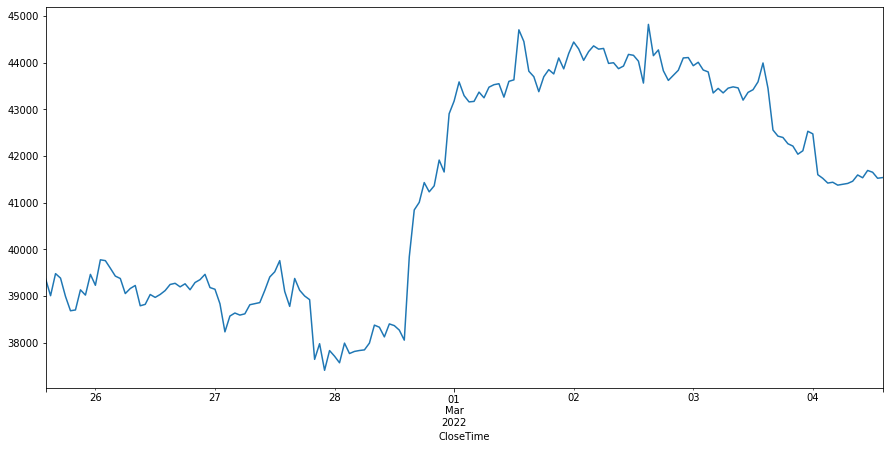

In [ ]:
btc['ClosePrice'].plot(figsize=(15, 7))

**Ether:**

In [ ]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-25 14:00:00,2714.63,2733.20,2703.97,2712.47,1746.796014,4.750217e+06
2022-02-25 15:00:00,2711.60,2717.32,2675.93,2683.21,2910.353629,7.855348e+06
2022-02-25 16:00:00,2683.05,2745.12,2657.87,2735.89,1558.744372,4.218442e+06
2022-02-25 17:00:00,2734.05,2749.14,2704.89,2727.01,766.566800,2.089463e+06
2022-02-25 18:00:00,2727.01,2733.31,2685.65,2695.14,748.220214,2.026702e+06


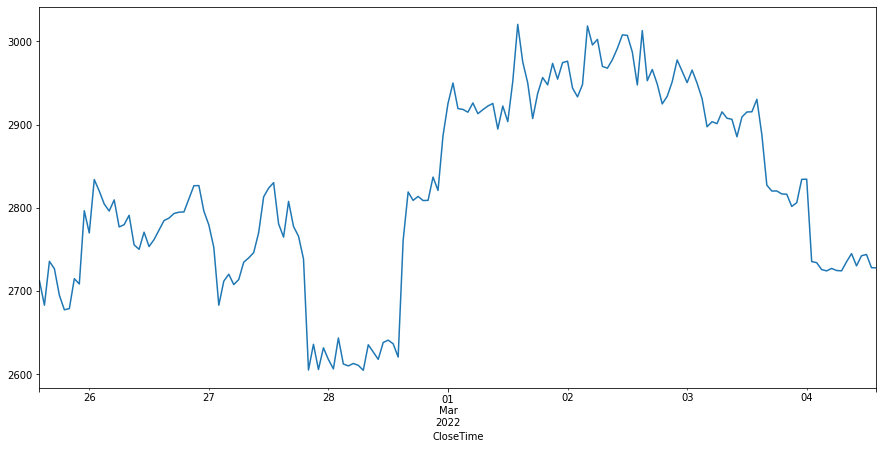

In [ ]:
eth['ClosePrice'].plot(figsize=(15, 7))

As you can see, we're able to pull data from the internet with just a few lines, create a DataFrame and plot it all within Jupyter Lab.

In [ ]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-25 14:00:00,2714.63,2733.20,2703.97,2712.47,1746.796014,4.750217e+06
2022-02-25 15:00:00,2711.60,2717.32,2675.93,2683.21,2910.353629,7.855348e+06
2022-02-25 16:00:00,2683.05,2745.12,2657.87,2735.89,1558.744372,4.218442e+06
2022-02-25 17:00:00,2734.05,2749.14,2704.89,2727.01,766.566800,2.089463e+06
2022-02-25 18:00:00,2727.01,2733.31,2685.65,2695.14,748.220214,2.026702e+06




### Dynamic plots with Bokeh



In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [ ]:
output_notebook()

And we generate the plot:

In [ ]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)



## Part 4: Exporting to Excel



In [ ]:
writer = pd.ExcelWriter('cryptos.xlsx')

We'll now write both our Bitcoin and Ether data as separate sheets:

In [ ]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [ ]:
eth.to_excel(writer, sheet_name='Ether')

And finally, we can save the file:

In [ ]:
writer.save()